In [1]:
import numpy as np
import matplotlib.pyplot as plt

# load train/test data from npy
data = np.load('train.npy')
labels = np.load('train_labels.npy')

# split into train and test
trainlen = int(len(labels) * 0.7)
train_data = data[:trainlen]
train_labels = labels[:trainlen]

test_data = data[trainlen:]
test_labels = labels[trainlen:]

(28, 28)


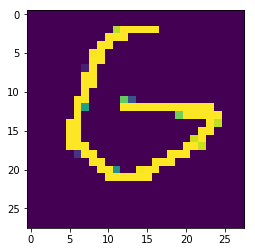

In [4]:
plt.imshow(train_data[0])
print(train_data[0].shape)

In [5]:
import tensorflow as tf
sess = tf.InteractiveSession()


/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
x = tf.placeholder(tf.float32, shape=[None, 28, 28])
y_ = tf.placeholder(tf.float32, shape=[None, 26])

In [7]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

In [8]:
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [9]:
x_image = tf.reshape(x, [-1, 28, 28, 1])

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.elu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.elu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [10]:
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.elu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [11]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [12]:
W_fc2 = weight_variable([1024, 525])
b_fc2 = bias_variable([525])
y_conv = tf.nn.elu(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)
yc1_drop = tf.nn.dropout(y_conv, keep_prob)

W_fc3 = weight_variable([525, 26])
b_fc3 = bias_variable([26])
y_conv2 = tf.matmul(yc1_drop, W_fc3) + b_fc3

In [15]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv2))
train_step = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv2, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [16]:
index = 0
def next_batch(batch_size):
    global index
    result = (train_data[index:(index + batch_size)], train_labels[index:(index + batch_size)])
    index += batch_size
    index %= len(train_data)
    return result

In [40]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for i in range(10000):
    batch = next_batch(64)
    if i % 100 == 0:
      train_accuracy = accuracy.eval(feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
      print('step %d, training accuracy %g' % (i, train_accuracy))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

  print('test accuracy %g' % accuracy.eval(feed_dict={
      x: test_data, y_: test_labels, keep_prob: 1.0}))
  prediction = tf.argmax(y_conv2, 1)

  predict=prediction.eval(feed_dict={x: test_data, keep_prob: 1.0},session=sess)
print(predict)
  

step 0, training accuracy 0
step 100, training accuracy 0.328125
step 200, training accuracy 0.421875
step 300, training accuracy 0.46875
step 400, training accuracy 0.375
step 500, training accuracy 0.109375
step 600, training accuracy 0.078125
step 700, training accuracy 0.15625
step 800, training accuracy 0.1875
step 900, training accuracy 0.234375
step 1000, training accuracy 0.109375
step 1100, training accuracy 0.359375
step 1200, training accuracy 0.4375
step 1300, training accuracy 0.390625
step 1400, training accuracy 0.46875
step 1500, training accuracy 0.421875
step 1600, training accuracy 0.4375
step 1700, training accuracy 0.484375
step 1800, training accuracy 0.53125
step 1900, training accuracy 0.515625
step 2000, training accuracy 0.578125
step 2100, training accuracy 0.59375
step 2200, training accuracy 0.578125
step 2300, training accuracy 0.609375
step 2400, training accuracy 0.6875
step 2500, training accuracy 0.625
step 2600, training accuracy 0.703125
step 2700, t

In [65]:
print(test_labels[7])

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [66]:
for i in predict[:10]:
    print(chr(65+i))

U
N
C
C
G
X
S
J
G
B


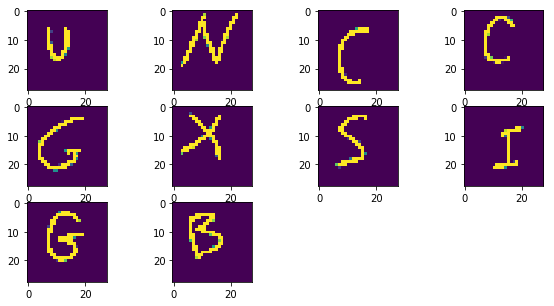

In [61]:
plt.figure(figsize=(10,5))
columns = 4
for i, image in enumerate(test_data[:10]):
#     print(image.shape)
    plt.subplot(len(test_data[:10]) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [20]:
saver = tf.train.Saver()
# saver.save(sess, '/home/usma/Desktop/Latin-Alphabet-Recognition-Using-Convolutional-Neural-Networks-in-Tensorflow-master/my_test_model',global_step=1000)

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_1' with dtype float and shape [?,26]
	 [[Node: Placeholder_1 = Placeholder[dtype=DT_FLOAT, shape=[?,26], _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]
	 [[Node: Mean_2/_3 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_118_Mean_2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Placeholder_1', defined at:
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tornado/platform/asyncio.py", line 112, in start
    self.asyncio_loop.run_forever()
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/asyncio/base_events.py", line 421, in run_forever
    self._run_once()
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/asyncio/base_events.py", line 1425, in _run_once
    handle._run()
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/asyncio/events.py", line 127, in _run
    self._callback(*self._args)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tornado/platform/asyncio.py", line 102, in _handle_events
    handler_func(fileobj, events)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-85fdaf304bd0>", line 2, in <module>
    y_ = tf.placeholder(tf.float32, shape=[None, 26])
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 1599, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 3091, in _placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_1' with dtype float and shape [?,26]
	 [[Node: Placeholder_1 = Placeholder[dtype=DT_FLOAT, shape=[?,26], _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]
	 [[Node: Mean_2/_3 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_118_Mean_2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


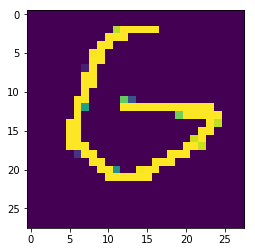

In [26]:
from skimage import io

#im1 = Image.open('/home/usma/Desktop/Latin-Alphabet-Recognition-Using-Convolutional-Neural-Networks-in-Tensorflow-master/images/Latin/Z/5958057042b7d.png')

# img = io.imread('/home/usma/Desktop/Latin-Alphabet-Recognition-Using-Convolutional-Neural-Networks-in-Tensorflow-master/images/Latin/Z/5958057042b7d.png',)
# plt.imshow(img)
img = train_data[0]
plt.imshow(img)
# print(nx);
IMG = np.reshape(img,(1,28,28))
# print(IMG);
with tf.Session() as sess:
    answer = sess.run(conv, feed_dict={x: IMG})
print(answer)

In [31]:
prediction = tf.argmax(y_conv2, 1)

prediction.eval(feed_dict={x: IMG, keep_prob: 1.0})

FailedPreconditionError: Attempting to use uninitialized value Variable_6
	 [[Node: Variable_6/read = Identity[T=DT_FLOAT, _class=["loc:@Variable_6"], _device="/job:localhost/replica:0/task:0/device:GPU:0"](Variable_6)]]
	 [[Node: ArgMax_8/_5 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_95_ArgMax_8", tensor_type=DT_INT64, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Variable_6/read', defined at:
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tornado/platform/asyncio.py", line 112, in start
    self.asyncio_loop.run_forever()
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/asyncio/base_events.py", line 421, in run_forever
    self._run_once()
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/asyncio/base_events.py", line 1425, in _run_once
    handle._run()
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/asyncio/events.py", line 127, in _run
    self._callback(*self._args)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tornado/platform/asyncio.py", line 102, in _handle_events
    handler_func(fileobj, events)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-4575186e2177>", line 1, in <module>
    W_fc2 = weight_variable([1024, 525])
  File "<ipython-input-7-d66681deb77e>", line 3, in weight_variable
    return tf.Variable(initial)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 213, in __init__
    constraint=constraint)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 356, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 125, in identity
    return gen_array_ops.identity(input, name=name)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2071, in identity
    "Identity", input=input, name=name)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/home/usma/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value Variable_6
	 [[Node: Variable_6/read = Identity[T=DT_FLOAT, _class=["loc:@Variable_6"], _device="/job:localhost/replica:0/task:0/device:GPU:0"](Variable_6)]]
	 [[Node: ArgMax_8/_5 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_95_ArgMax_8", tensor_type=DT_INT64, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [21]:
print(x[0].shape)

(28, 28)


In [18]:
import os, cv2
import numpy as np
from PIL import Image
from random import shuffle
import matplotlib.pyplot as plt

f = []
labels = []
traindir = 'images/Latin/%s/'

for c in "ABCDEFGHIJKLMNOPQRSTUVWXYZ":
	prev = len(f)
	fnames = os.listdir(traindir % c)
	f.extend(fnames)
	labels.extend([c] * len(fnames))

processed = []
j = 0
for i in range(len(f)):
        image = Image.open((traindir % labels[i]) + f[i])
        cpy = image.copy()
        cpy = cpy.resize((28,28))
        #image = cv2.imread((traindir % labels[i]) + f[i])
        
        processed.append(np.array(cpy)[:,:,3])
        image.close()
        j += 1
        if j % 100 == 0:
                print(j, np.array(processed).shape)

for i in range(len(labels)):
        vec = [0] * 26
        vec[ord(labels[i]) - ord('A')] = 1
        labels[i] = np.array(vec)

labels = np.array(labels)
shuffler = list(zip(processed, labels))
shuffle(shuffler)
processed, labels = zip(*shuffler)
savedata = np.array(processed)
np.save('train.npy', savedata)
np.save('train_labels.npy', labels)
print(savedata.shape)


ModuleNotFoundError: No module named 'cv2'

In [4]:
# Copyright 2015 The TensorFlow Authors. All Rights Reserved.

#

# Licensed under the Apache License, Version 2.0 (the "License");

# you may not use this file except in compliance with the License.

# You may obtain a copy of the License at

#

#     http://www.apache.org/licenses/LICENSE-2.0

#

# Unless required by applicable law or agreed to in writing, software

# distributed under the License is distributed on an "AS IS" BASIS,

# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.

# See the License for the specific language governing permissions and

# limitations under the License.

# ==============================================================================

"""TensorFlow is an open source machine learning framework for everyone.



TensorFlow is an open source software library for high performance numerical

computation. Its flexible architecture allows easy deployment of computation

across a variety of platforms (CPUs, GPUs, TPUs), and from desktops to clusters

of servers to mobile and edge devices.



Originally developed by researchers and engineers from the Google Brain team

within Google's AI organization, it comes with strong support for machine

learning and deep learning and the flexible numerical computation core is used

across many other scientific domains.

"""



from __future__ import absolute_import

from __future__ import division

from __future__ import print_function



import fnmatch

import os

import re

import sys



from setuptools import Command

from setuptools import find_packages

from setuptools import setup

from setuptools.command.install import install as InstallCommandBase

from setuptools.dist import Distribution



DOCLINES = __doc__.split('\n')



# This version string is semver compatible, but incompatible with pip.

# For pip, we will remove all '-' characters from this string, and use the

# result for pip.

_VERSION = '1.11.0-rc1'



REQUIRED_PACKAGES = [

    'absl-py >= 0.1.6',

    'astor >= 0.6.0',

    'gast >= 0.2.0',

    'keras_applications >= 1.0.6',

    'keras_preprocessing >= 1.0.5',

    'numpy >= 1.13.3',

    'six >= 1.10.0',

    'protobuf >= 3.6.1',

    'tensorboard >= 1.11.0, < 1.12.0',

    'termcolor >= 1.1.0',

]



if sys.byteorder == 'little':

  # grpcio does not build correctly on big-endian machines due to lack of

  # BoringSSL support.

  # See https://github.com/tensorflow/tensorflow/issues/17882.

  REQUIRED_PACKAGES.append('grpcio >= 1.8.6')



project_name = 'tensorflow'

if '--project_name' in sys.argv:

  project_name_idx = sys.argv.index('--project_name')

  project_name = sys.argv[project_name_idx + 1]

  sys.argv.remove('--project_name')

  sys.argv.pop(project_name_idx)



# python3 requires wheel 0.26

if sys.version_info.major == 3:

  REQUIRED_PACKAGES.append('wheel >= 0.26')

else:

  REQUIRED_PACKAGES.append('wheel')

  # mock comes with unittest.mock for python3, need to install for python2

  REQUIRED_PACKAGES.append('mock >= 2.0.0')



# tf-nightly should depend on tb-nightly

if 'tf_nightly' in project_name:

  for i, pkg in enumerate(REQUIRED_PACKAGES):

    if 'tensorboard' in pkg:

      REQUIRED_PACKAGES[i] = 'tb-nightly >= 1.12.0a0, < 1.13.0a0'

      break



# weakref.finalize and enum were introduced in Python 3.4

if sys.version_info < (3, 4):

  REQUIRED_PACKAGES.append('backports.weakref >= 1.0rc1')

  REQUIRED_PACKAGES.append('enum34 >= 1.1.6')



# pylint: disable=line-too-long

CONSOLE_SCRIPTS = [

    'freeze_graph = tensorflow.python.tools.freeze_graph:run_main',

    'toco_from_protos = tensorflow.contrib.lite.toco.python.toco_from_protos:main',

    'tflite_convert = tensorflow.contrib.lite.python.tflite_convert:main',

    'toco = tensorflow.contrib.lite.python.tflite_convert:main',

    'saved_model_cli = tensorflow.python.tools.saved_model_cli:main',

    # We need to keep the TensorBoard command, even though the console script

    # is now declared by the tensorboard pip package. If we remove the

    # TensorBoard command, pip will inappropriately remove it during install,

    # even though the command is not removed, just moved to a different wheel.

    'tensorboard = tensorboard.main:run_main',

]

# pylint: enable=line-too-long



# remove the tensorboard console script if building tf_nightly

if 'tf_nightly' in project_name:

  CONSOLE_SCRIPTS.remove('tensorboard = tensorboard.main:run_main')



TEST_PACKAGES = [

    'scipy >= 0.15.1',

]





class BinaryDistribution(Distribution):



  def has_ext_modules(self):

    return True





class InstallCommand(InstallCommandBase):

  """Override the dir where the headers go."""



  def finalize_options(self):

    ret = InstallCommandBase.finalize_options(self)

    self.install_headers = os.path.join(self.install_purelib,

                                        'tensorflow', 'include')

    return ret





class InstallHeaders(Command):

  """Override how headers are copied.



  The install_headers that comes with setuptools copies all files to

  the same directory. But we need the files to be in a specific directory

  hierarchy for -I <include_dir> to work correctly.

  """

  description = 'install C/C++ header files'



  user_options = [('install-dir=', 'd',

                   'directory to install header files to'),

                  ('force', 'f',

                   'force installation (overwrite existing files)'),

                 ]



  boolean_options = ['force']



  def initialize_options(self):

    self.install_dir = None

    self.force = 0

    self.outfiles = []



  def finalize_options(self):

    self.set_undefined_options('install',

                               ('install_headers', 'install_dir'),

                               ('force', 'force'))



  def mkdir_and_copy_file(self, header):

    install_dir = os.path.join(self.install_dir, os.path.dirname(header))

    # Get rid of some extra intervening directories so we can have fewer

    # directories for -I

    install_dir = re.sub('/google/protobuf_archive/src', '', install_dir)



    # Copy external code headers into tensorflow/include.

    # A symlink would do, but the wheel file that gets created ignores

    # symlink within the directory hierarchy.

    # NOTE(keveman): Figure out how to customize bdist_wheel package so

    # we can do the symlink.

    external_header_locations = [

        'tensorflow/include/external/eigen_archive/',

        'tensorflow/include/external/com_google_absl/',

    ]

    for location in external_header_locations:

      if location in install_dir:

        extra_dir = install_dir.replace(location, '')

        if not os.path.exists(extra_dir):

          self.mkpath(extra_dir)

        self.copy_file(header, extra_dir)



    if not os.path.exists(install_dir):

      self.mkpath(install_dir)

    return self.copy_file(header, install_dir)



  def run(self):

    hdrs = self.distribution.headers

    if not hdrs:

      return



    self.mkpath(self.install_dir)

    for header in hdrs:

      (out, _) = self.mkdir_and_copy_file(header)

      self.outfiles.append(out)



  def get_inputs(self):

    return self.distribution.headers or []



  def get_outputs(self):

    return self.outfiles





def find_files(pattern, root):

  """Return all the files matching pattern below root dir."""

  for dirpath, _, files in os.walk(root):

    for filename in fnmatch.filter(files, pattern):

      yield os.path.join(dirpath, filename)





so_lib_paths = [

    i for i in os.listdir('.')

    if os.path.isdir(i) and fnmatch.fnmatch(i, '_solib_*')

]



matches = []

for path in so_lib_paths:

  matches.extend(

      ['../' + x for x in find_files('*', path) if '.py' not in x]

  )



if os.name == 'nt':

  EXTENSION_NAME = 'python/_pywrap_tensorflow_internal.pyd'

else:

  EXTENSION_NAME = 'python/_pywrap_tensorflow_internal.so'



headers = (

    list(find_files('*.h', 'tensorflow/core')) + list(

        find_files('*.h', 'tensorflow/stream_executor')) +

    list(find_files('*.h', 'google/protobuf_archive/src')) + list(

        find_files('*', 'third_party/eigen3')) + list(

            find_files('*.h', 'tensorflow/include/external/com_google_absl')) +

    list(find_files('*.inc', 'tensorflow/include/external/com_google_absl')) +

    list(find_files('*', 'tensorflow/include/external/eigen_archive')))



setup(

    name=project_name,

    version=_VERSION.replace('-', ''),

    description=DOCLINES[0],

    long_description='\n'.join(DOCLINES[2:]),

    url='https://www.tensorflow.org/',

    download_url='https://github.com/tensorflow/tensorflow/tags',

    author='Google Inc.',

    author_email='opensource@google.com',

    # Contained modules and scripts.

    packages=find_packages(),

    entry_points={

        'console_scripts': CONSOLE_SCRIPTS,

    },

    headers=headers,

    install_requires=REQUIRED_PACKAGES,

    tests_require=REQUIRED_PACKAGES + TEST_PACKAGES,

    # Add in any packaged data.

    include_package_data=True,

    package_data={

        'tensorflow': [

            EXTENSION_NAME,

        ] + matches,

    },

    zip_safe=False,

    distclass=BinaryDistribution,

    cmdclass={

        'install_headers': InstallHeaders,

        'install': InstallCommand,

    },

    # PyPI package information.

    classifiers=[

        'Development Status :: 5 - Production/Stable',

        'Intended Audience :: Developers',

        'Intended Audience :: Education',

        'Intended Audience :: Science/Research',

        'License :: OSI Approved :: Apache Software License',

        'Programming Language :: Python :: 2',

        'Programming Language :: Python :: 2.7',

        'Programming Language :: Python :: 3',

        'Programming Language :: Python :: 3.4',

        'Programming Language :: Python :: 3.5',

        'Programming Language :: Python :: 3.6',

        'Topic :: Scientific/Engineering',

        'Topic :: Scientific/Engineering :: Mathematics',

        'Topic :: Scientific/Engineering :: Artificial Intelligence',

        'Topic :: Software Development',

        'Topic :: Software Development :: Libraries',

        'Topic :: Software Development :: Libraries :: Python Modules',

    ],

    license='Apache 2.0',

    keywords='tensorflow tensor machine learning',

)

SystemExit: usage: ipykernel_launcher.py [global_opts] cmd1 [cmd1_opts] [cmd2 [cmd2_opts] ...]
   or: ipykernel_launcher.py --help [cmd1 cmd2 ...]
   or: ipykernel_launcher.py --help-commands
   or: ipykernel_launcher.py cmd --help

error: option -f not recognized

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2971: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
